In [123]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/notebooks/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/notebooks/titanic/train.csv
/notebooks/titanic/gender_submission.csv
/notebooks/titanic/test.csv


In [167]:
train_data = pd.read_csv("/notebooks/titanic/train.csv")
predict_data = pd.read_csv("notebooks/titanic/test.csv")
gender_submission = pd.read_csv("/notebooks/titanic/gender_submission.csv")

|Variable|Definition||
|--------|----------|--|
|survival | Survival | 0 = No, 1 = Yes|
|pclass | Ticket class |1 = 1st, 2 = 2nd, 3 = 3rd|
|sex | Sex |male/female|
|Age |Age in years|#|
|sibsp | # of siblings / spouses aboard the Titanic|#|
|parch |# of parents / children aboard the Titanic|#|
|ticket|Ticket number|alphanumeric|
|fare|Passenger fare|#|
|cabin|Cabin number|alphanumeric|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

In [168]:
train_data["Age"] = train_data["Age"].fillna(100)
predict_data["Age"] = predict_data["Age"].fillna(100)
train_data["Fare"] = train_data["Fare"].fillna(0)
predict_data["Fare"] = predict_data["Fare"].fillna(0)
# train_data["Embarked"] = train_data["Embarked"].fillna("N")
# predict_data["Embarked"] = predict_data["Embarked"].fillna("N")

In [109]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [177]:
train_set = train_data[:800]
val_set = train_data[800:]
train_set.shape, val_set.shape
# train_data = train_data[train_data["Embarked"].notna()]
# predict_data[predict_data["Embarked"].notna()]

((800, 12), (91, 12))

In [178]:
import math
from sklearn.ensemble import RandomForestClassifier

#preprocessing
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
# split train and test sets
X_train = pd.get_dummies(train_set[features])
X_val = pd.get_dummies(val_set[features])
y_train = train_set["Survived"]
y_val  = val_set["Survived"]
print(X_train.shape, X_val.shape)
X_predict = pd.get_dummies(predict_data[features])


(800, 10) (91, 10)


In [181]:
#training
model = RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=1)
model.fit(X_train, y_train)

#testing
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_val)
print(f'train_accuracy = {np.mean(np.equal(predictions_train, y_train))} val_accuracy = {np.mean(np.equal(predictions_test, y_val))}')

train_accuracy = 0.8725 val_accuracy = 0.8461538461538461


In [171]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1, max_iter=1000)
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_val)
print(f'train_accuracy = {np.mean(np.equal(predictions_train, y_train))} val_accuracy = {np.mean(np.equal(predictions_test, y_val))}')

train_accuracy = 0.80375 val_accuracy = 0.8131868131868132


In [179]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state=1)
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_val)
print(f'train_accuracy = {np.mean(np.equal(predictions_train, y_train))} val_accuracy = {np.mean(np.equal(predictions_test, y_val))}')

train_accuracy = 0.68625 val_accuracy = 0.7252747252747253


In [ ]:
predictions = model.predict(X_predict)
output = pd.DataFrame({'PassengerId': predict_data.PassengerId, 'Survived': predictions})
output.to_csv('/notebooks/submission.csv', index=False)
print("Your submission was successfully saved!")

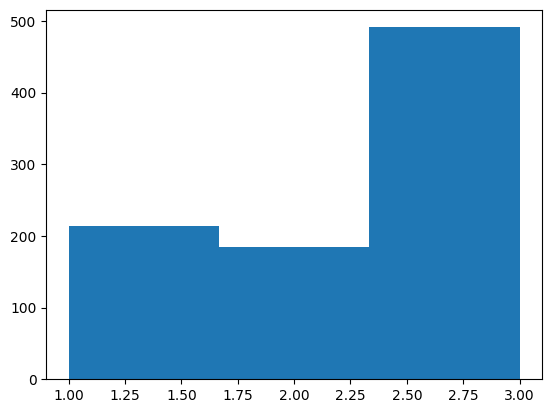

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.hist(train_data["Pclass"], bins=3)
plt.show()

In [159]:
print(train_data[(train_data["Survived"] == 1) & (train_data["Pclass"] == 1)].shape[0]/train_data[train_data["Pclass"] == 1].shape[0])
print(train_data[(train_data["Survived"] == 1) & (train_data["Pclass"] == 2)].shape[0]/train_data[train_data["Pclass"] == 2].shape[0])
print(train_data[(train_data["Survived"] == 1) & (train_data["Pclass"] == 3)].shape[0]/train_data[train_data["Pclass"] == 3].shape[0])

0.6261682242990654
0.47282608695652173
0.24236252545824846
